In [22]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Reading the Data
https://www.kaggle.com/chirag19/air-passengers?select=AirPassengers.csv

Other Time series datasets for further practice
https://www.kaggle.com/shenba/time-series-datasets

In [104]:
df = pd.read_csv('C:/Users/aksin52/Documents/MachineLearningExpress - Course Content/Python Time Series/AirPassengers.csv', header=0,index_col=0)
df.tail()

,Passengers
Month,
1960-08,606
1960-09,508
1960-10,461
1960-11,390
1960-12,432


Visulalizing the time series

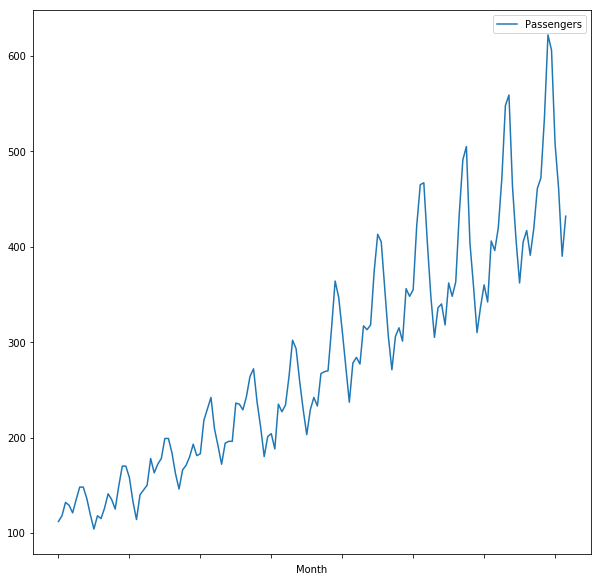

In [25]:
import matplotlib.pyplot as plt
df.plot()
plt.show()    

The example below decomposes the airline passengers dataset as a multiplicative model

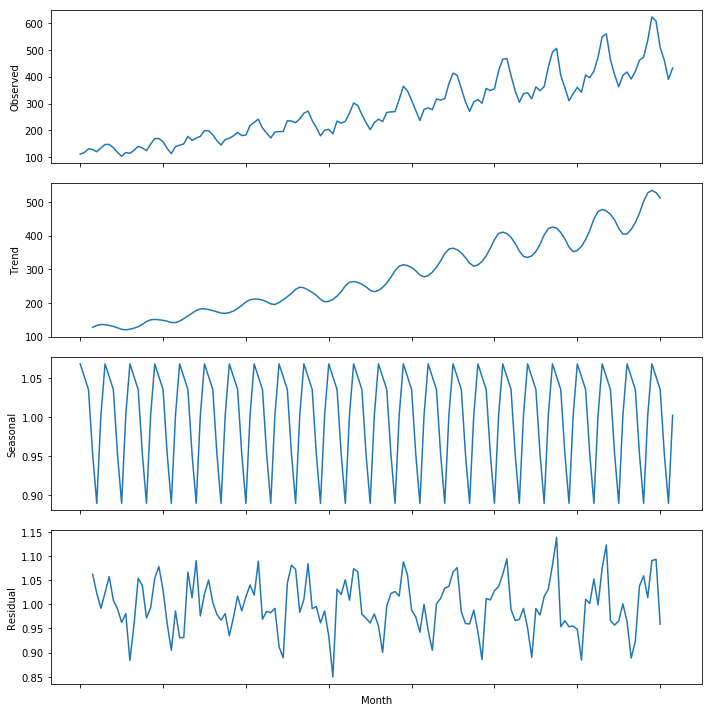

In [111]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative',freq=6)
result.plot()
plt.show()

Statsmodels is a Python module that provides classes and functions for implementing many different statistical models. 
We need to import it into Python code as follows

In [112]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [125]:
df = pd.read_csv('C:/Users/aksin52/Documents/MachineLearningExpress - Course Content/Python Time Series/AirPassengers.csv', header=0,index_col=0)
df.tail()

,Passengers
Month,
1960-08,606
1960-09,508
1960-10,461
1960-11,390
1960-12,432


C:\Anaconda_Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda_Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda_Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


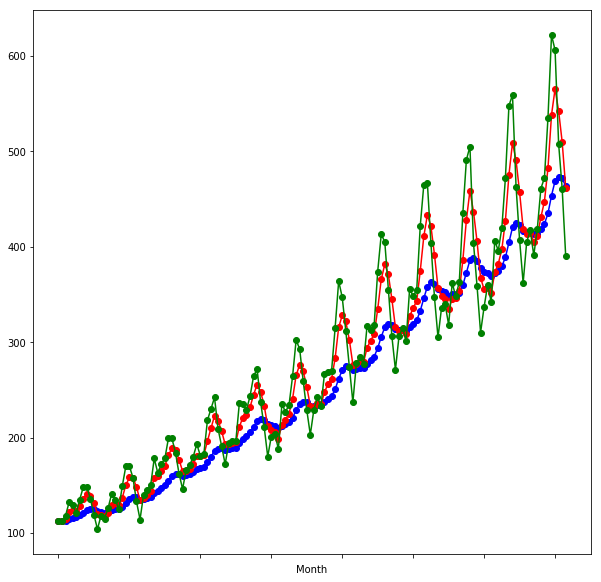

In [133]:
# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(df).fit(smoothing_level=0.1,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')
fit1.fittedvalues.plot(marker='o',  color='blue')

fit2 = SimpleExpSmoothing(df).fit(smoothing_level=0.4,optimized=False)
fcast2 = fit2.forecast(12).rename(r'$\alpha=0.6$')
fit2.fittedvalues.plot(marker='o', color='red')


fit3 = SimpleExpSmoothing(df).fit()
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
fit3.fittedvalues.plot(marker='o', color='green')

plt.show()

In [136]:
fcast3=fit3.forecast(12)
fcast1

1961-01-01    460.302772
1961-02-01    460.302772
1961-03-01    460.302772
1961-04-01    460.302772
1961-05-01    460.302772
1961-06-01    460.302772
1961-07-01    460.302772
1961-08-01    460.302772
1961-09-01    460.302772
1961-10-01    460.302772
1961-11-01    460.302772
1961-12-01    460.302772
Freq: MS, dtype: float64

C:\Anaconda_Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


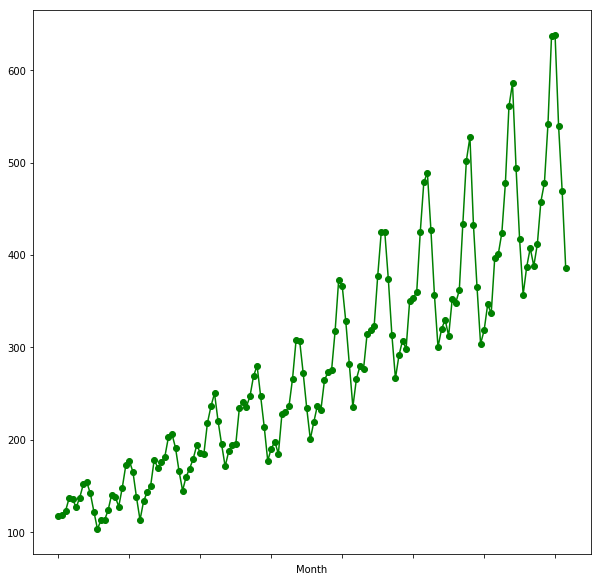

1961-01-01    410.106229
1961-02-01    397.450814
1961-03-01    384.795399
1961-04-01    372.139984
1961-05-01    359.484569
1961-06-01    346.829154
1961-07-01    334.173739
1961-08-01    321.518325
1961-09-01    308.862910
1961-10-01    296.207495
1961-11-01    283.552080
1961-12-01    270.896665
Freq: MS, Name: Holt's linear trend, dtype: float64

In [135]:
fit4 = Holt(df).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast4 = fit4.forecast(12).rename("Holt's linear trend")
fit4.fittedvalues.plot(marker="o", color='green')
plt.show()


In [142]:
fcast4 = fit4.forecast(24)
fcast4

1961-01-01    410.106229
1961-02-01    397.450814
1961-03-01    384.795399
1961-04-01    372.139984
1961-05-01    359.484569
1961-06-01    346.829154
1961-07-01    334.173739
1961-08-01    321.518325
1961-09-01    308.862910
1961-10-01    296.207495
1961-11-01    283.552080
1961-12-01    270.896665
1962-01-01    258.241250
1962-02-01    245.585835
1962-03-01    232.930420
1962-04-01    220.275005
1962-05-01    207.619590
1962-06-01    194.964175
1962-07-01    182.308760
1962-08-01    169.653345
1962-09-01    156.997930
1962-10-01    144.342515
1962-11-01    131.687100
1962-12-01    119.031685
Freq: MS, dtype: float64

C:\Anaconda_Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


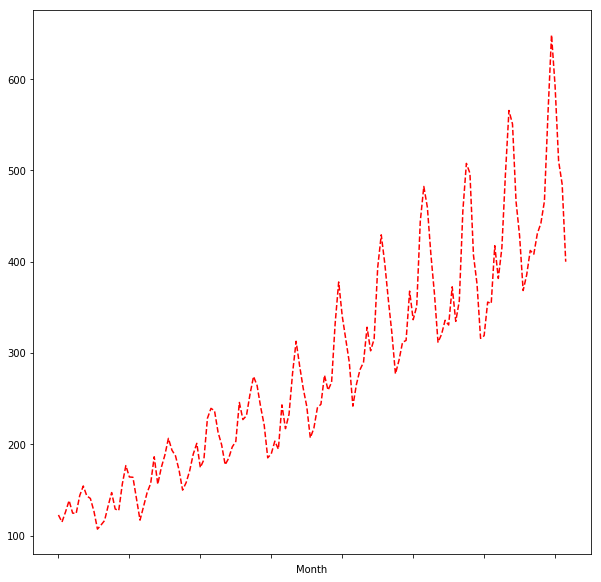

Forecasting sales of properties using Holt-Wnters method with additive seasonality.


In [139]:
fit5 = ExponentialSmoothing(df, seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
fit5.fittedvalues.plot(style='--', color='red')
plt.show()
print("Forecasting sales of properties using Holt-Wnters method with additive seasonality.")

In [144]:
pred_holt_winter=fit5.forecast(36)
pred_holt_winter

1961-01-01    408.701739
1961-02-01    403.405689
1961-03-01    416.942696
1961-04-01    429.130948
1961-05-01    407.617651
1961-06-01    402.333583
1961-07-01    415.840008
1961-08-01    428.000850
1961-09-01    406.536014
1961-10-01    401.263906
1961-11-01    414.739806
1961-12-01    426.873290
1962-01-01    405.456823
1962-02-01    400.196652
1962-03-01    413.642085
1962-04-01    425.748261
1962-05-01    404.380073
1962-06-01    399.131818
1962-07-01    412.546840
1962-08-01    424.625759
1962-09-01    403.305761
1962-10-01    398.069399
1962-11-01    411.454067
1962-12-01    423.505780
1963-01-01    402.233882
1963-02-01    397.009390
1963-03-01    410.363760
1963-04-01    422.388318
1963-05-01    401.164431
1963-06-01    395.951787
1963-07-01    409.275917
1963-08-01    421.273369
1963-09-01    400.097403
1963-10-01    394.896586
1963-11-01    408.190531
1963-12-01    420.160929
Freq: MS, dtype: float64